1.Загрузите файл HR.csv в pandas dataframe.

In [166]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score

In [25]:
hr= pd.read_csv('C:\\Users\\koves\\Desktop\\Magistratura\\Python\\hr.csv')
hr.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


2.Рассчитайте основные статистики для переменных: среднее, медиана, мода, мин/макс, среднее отклонение.

In [3]:
hr.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


3.Рассчитайте и визуализируйте корреляционную матрицу для количественных переменных. Определите две самые скоррелированные и две наименее скоррелированные переменные.

In [9]:
hr_n = hr[['satisfaction_level','last_evaluation','number_project','average_montly_hours','time_spend_company','Work_accident','left','promotion_last_5years']]

<Axes: >

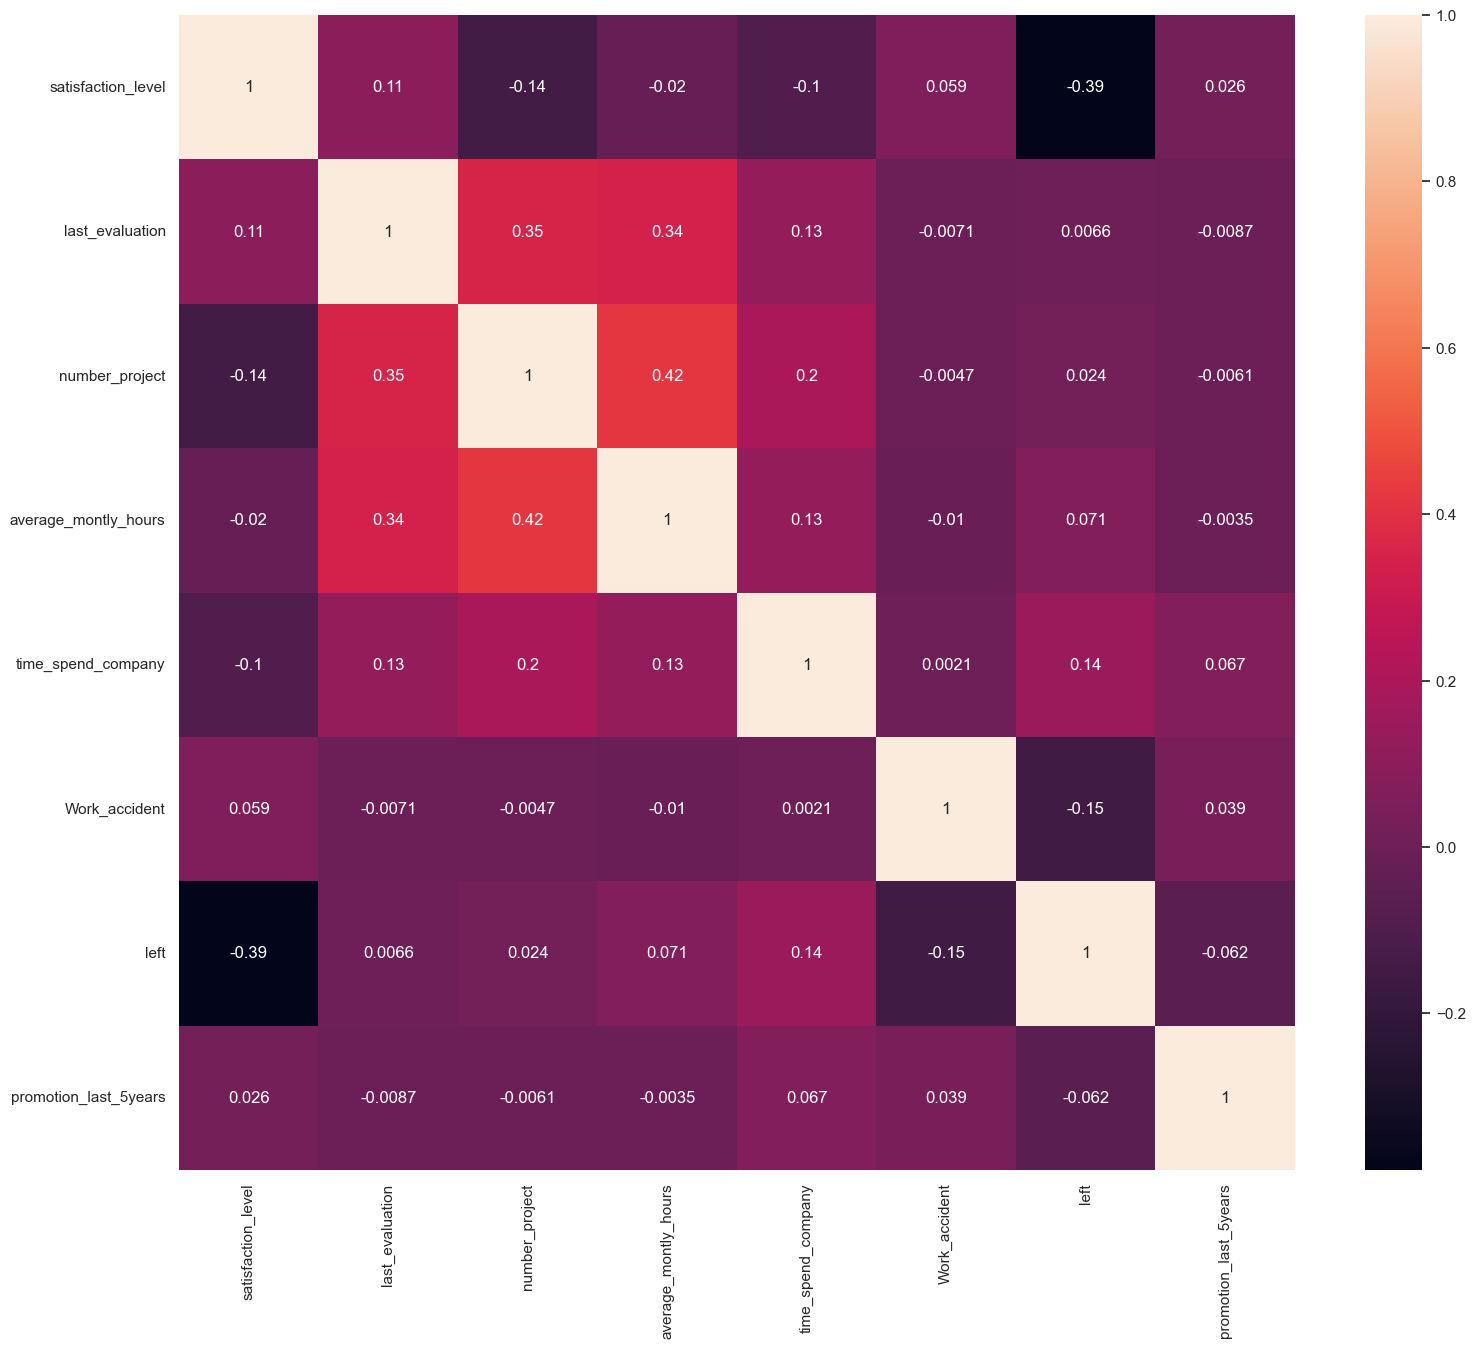

In [21]:
corr = hr_n.corr()
sns.set(rc={'figure.figsize':(18,15)})
sns.heatmap(corr, annot=True)

Две самые скоррелированные переменные - average_montly_hours и number_projects
Две наименее скорреллированные переменные - left и satisfaction_level 

4.Рассчитайте, сколько сотрудников работает в каждом департаменте.

In [58]:
count_department = hr.groupby(['department'])['Work_accident'].agg('count').reset_index(name = 'count')
count_department

,department,count
0,IT,1227
1,RandD,787
2,accounting,767
3,hr,739
4,management,630
5,marketing,858
6,product_mng,902
7,sales,4140
8,support,2229
9,technical,2720


5.Покажите распределение сотрудников по зарплатам.

In [59]:
salary = hr.groupby(['salary'])['Work_accident'].agg('count').reset_index(name = 'count')
salary

,salary,count
0,high,1237
1,low,7316
2,medium,6446


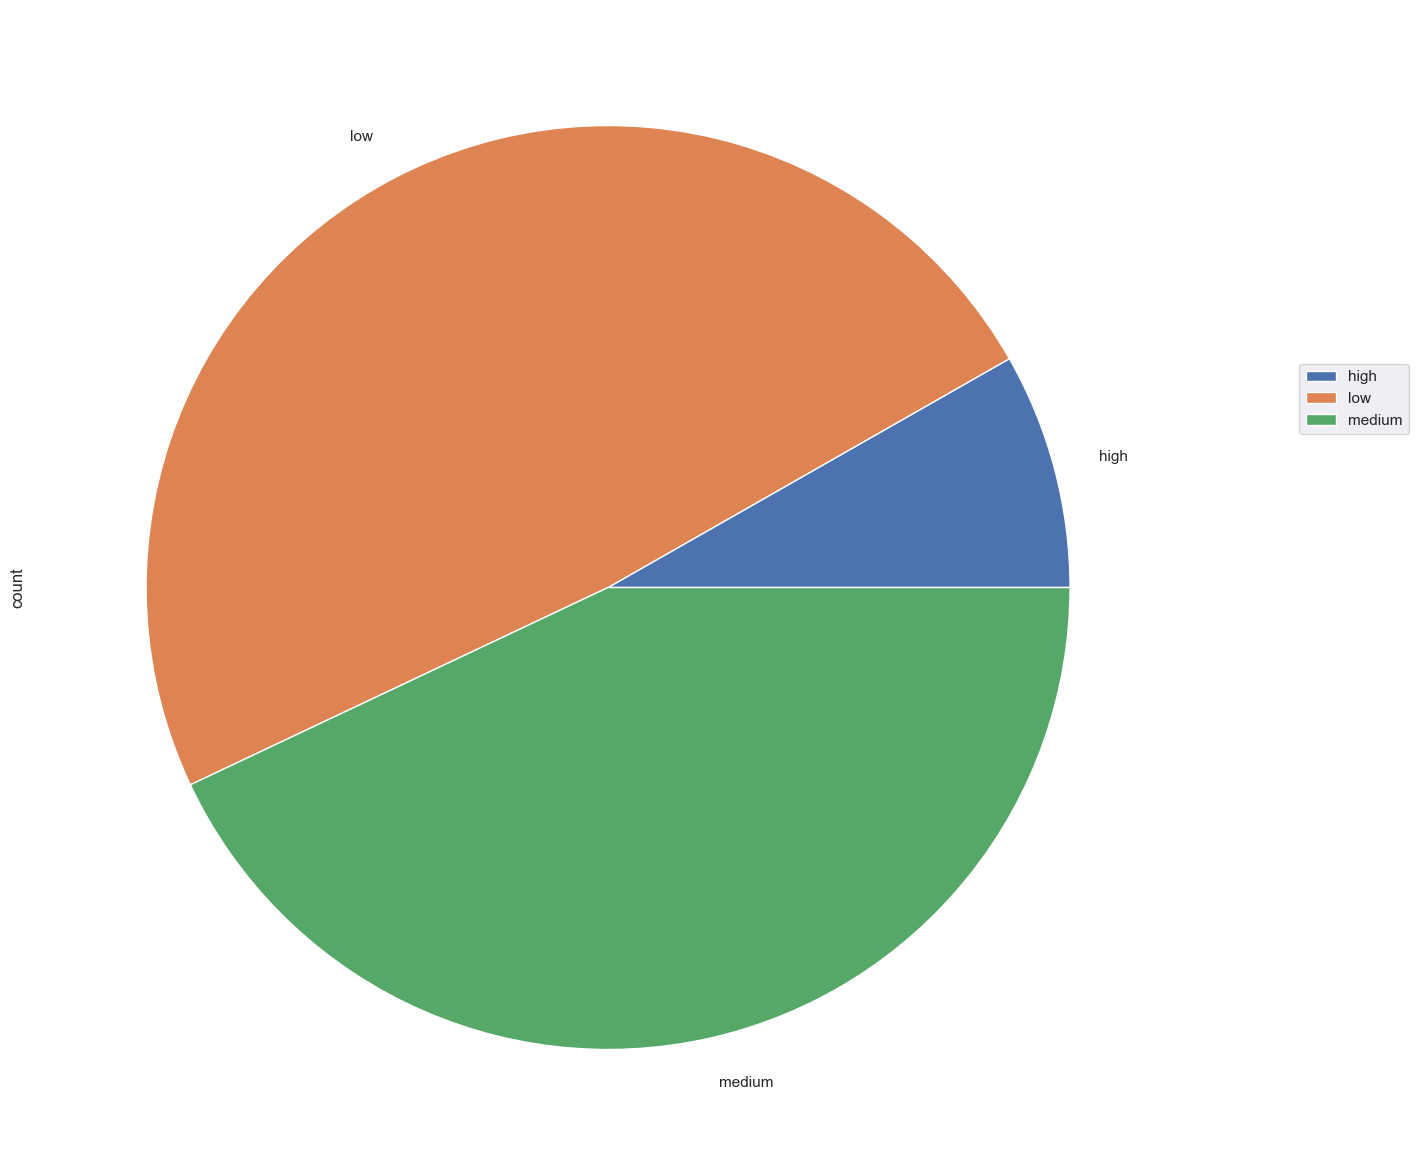

In [84]:
salary.groupby(['salary']).sum().plot(kind='pie',y = 'count')
plt.legend(bbox_to_anchor=(0.6, .5, 0.6, 0.2))

6.Покажите распределение сотрудников по зарплатам в каждом департаменте по отдельности.

In [89]:
salary_department = hr.groupby(['department','salary'])['Work_accident'].agg('count').reset_index(name = 'count')
salary_department

,department,salary,count
0,IT,high,83
1,IT,low,609
2,IT,medium,535
3,RandD,high,51
4,RandD,low,364
5,RandD,medium,372
6,accounting,high,74
7,accounting,low,358
8,accounting,medium,335
9,hr,high,45


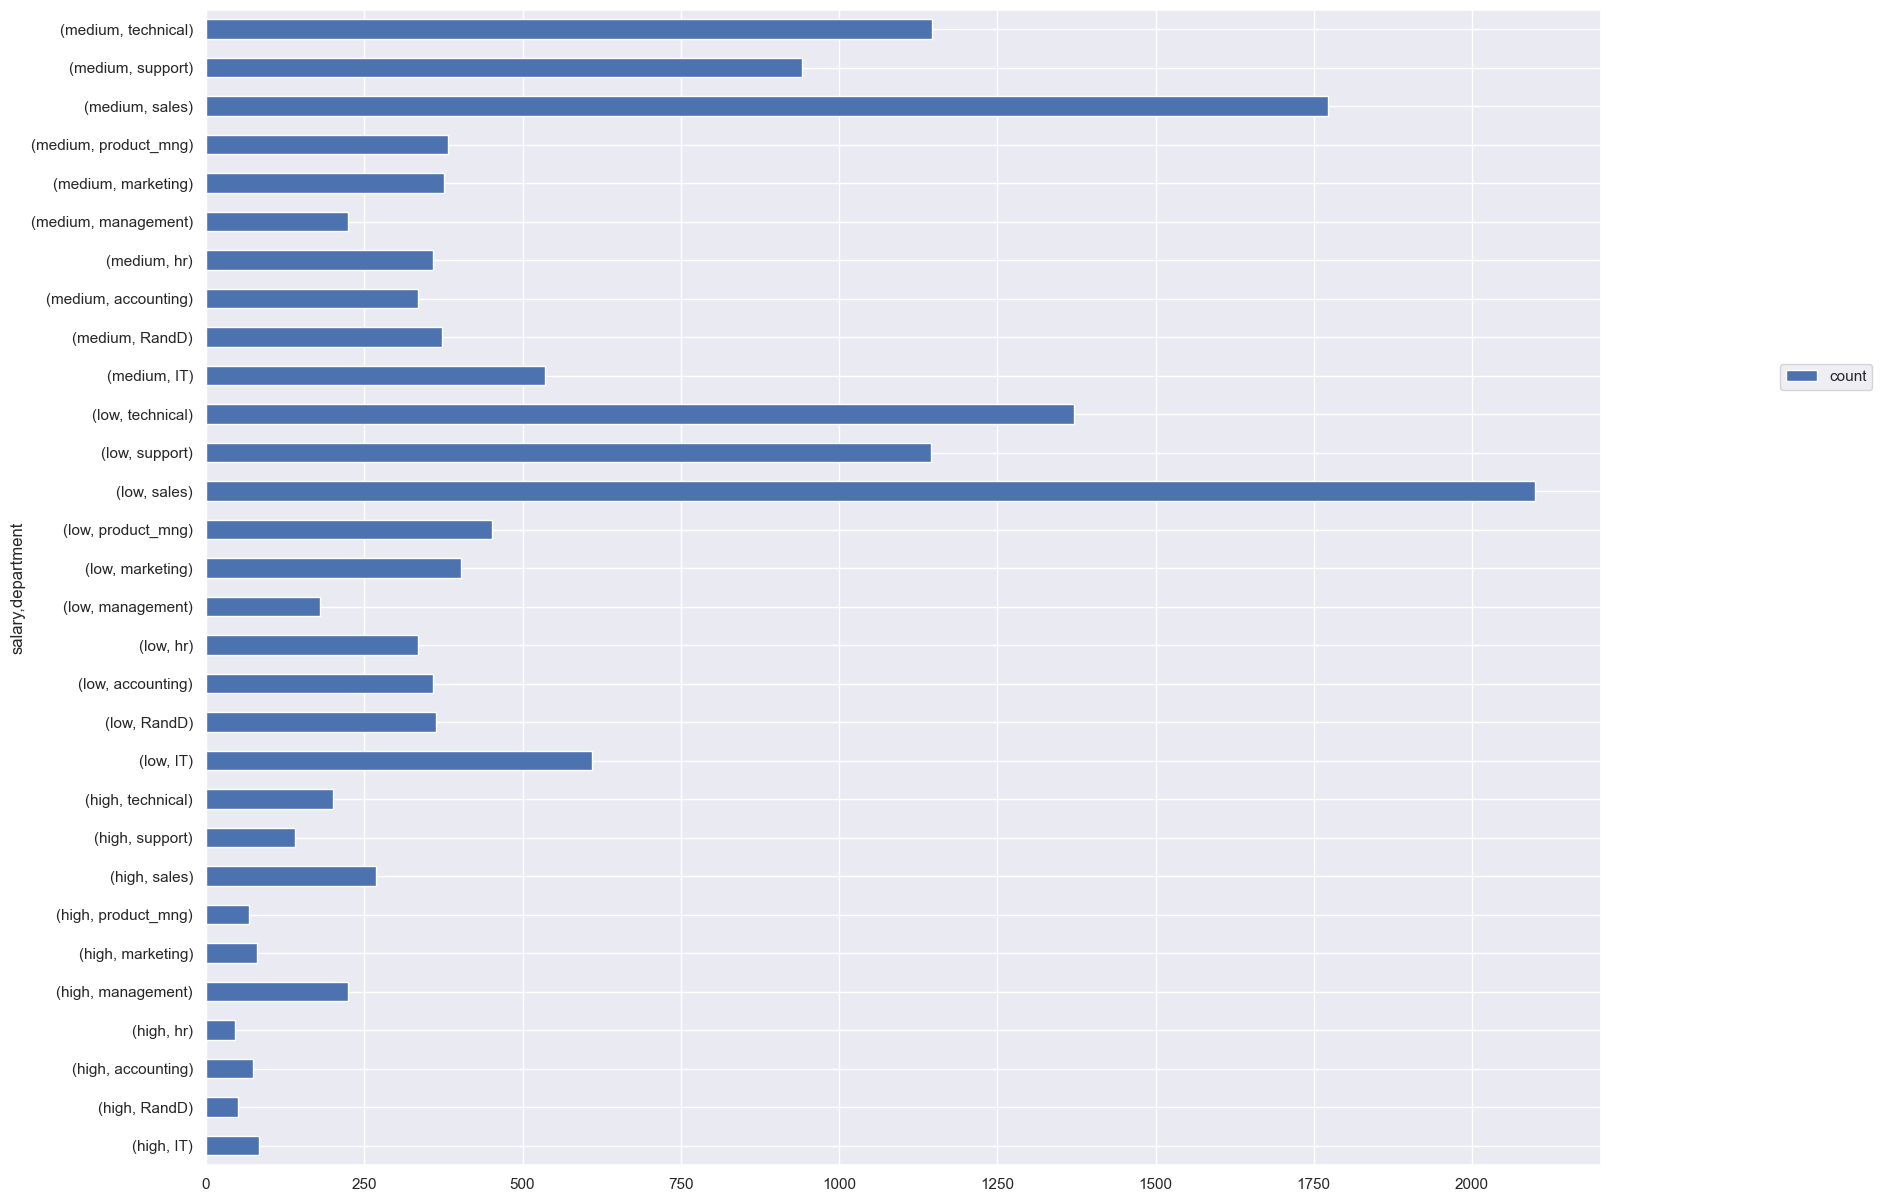

In [107]:
salary_department.groupby(['salary','department']).sum().plot(kind='barh',y = 'count')
plt.legend(bbox_to_anchor=(0.6, .5, 0.6, 0.2))

7.Проверьте гипотезу, что сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом.

In [123]:
salary_high = list(hr.loc[hr['salary'] == 'high']['average_montly_hours'])
salary_low = list(hr.loc[hr['salary'] == 'low']['average_montly_hours'])

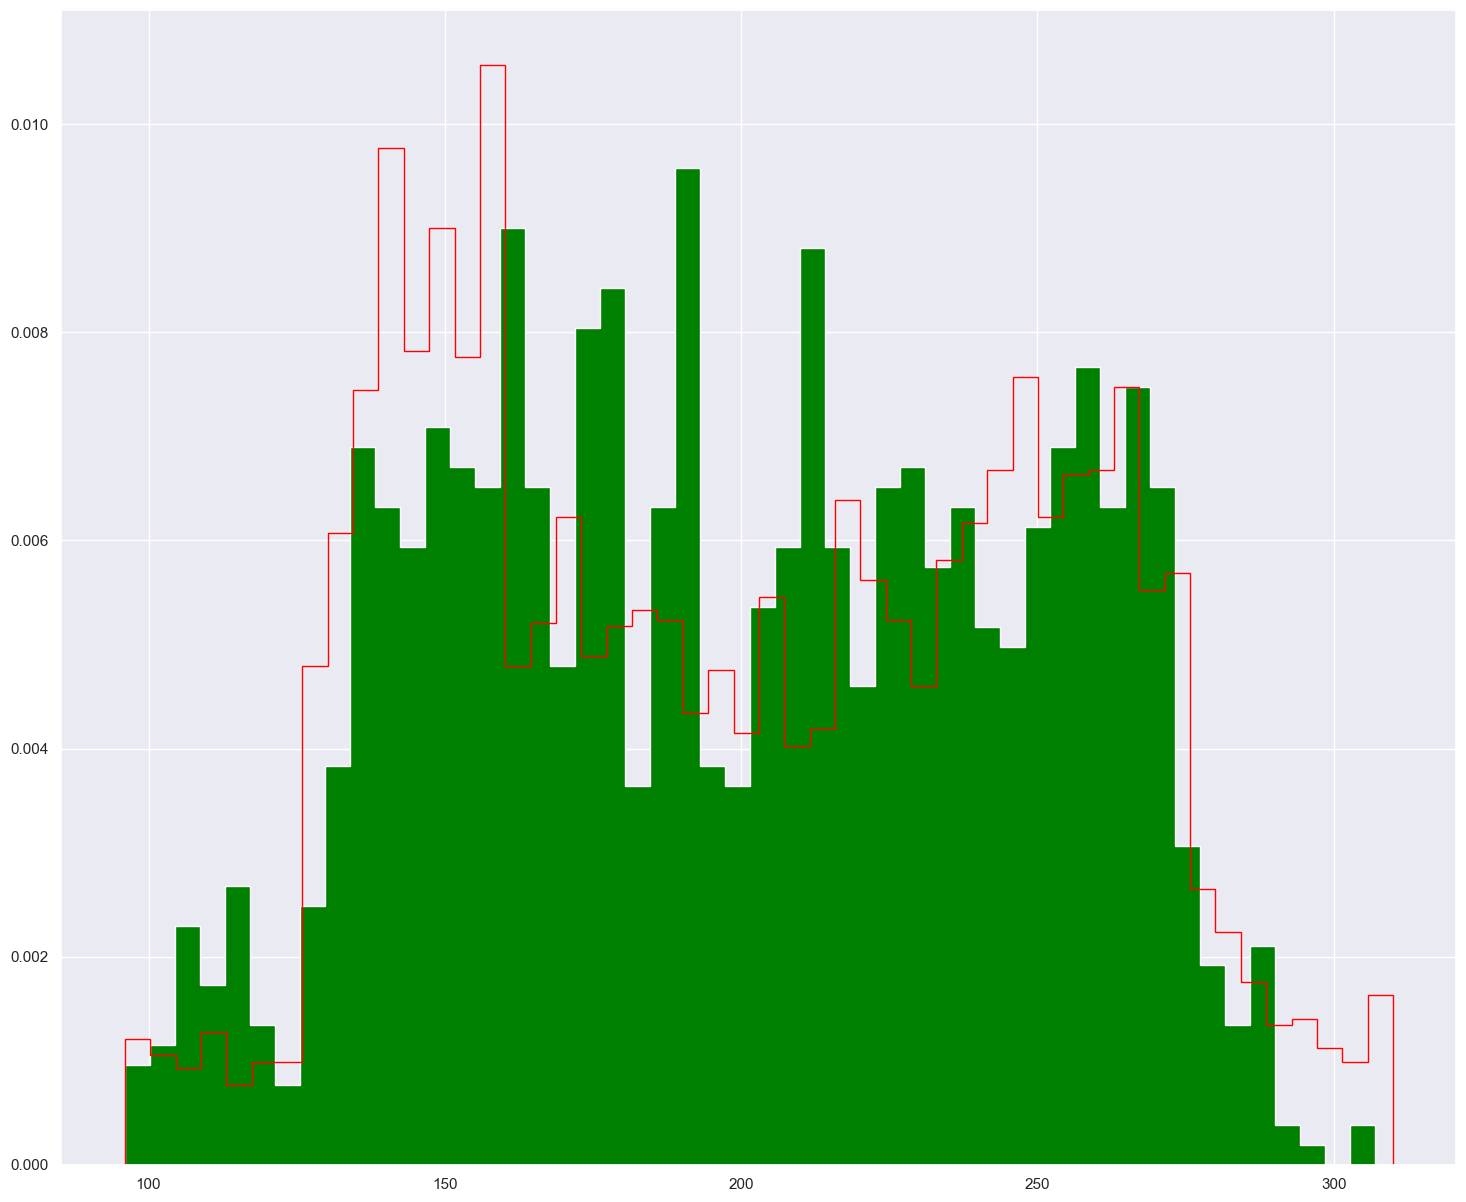

In [135]:
plt.hist(salary_high, bins=50, density=True,histtype ='stepfilled',color = 'green');
plt.hist(salary_low, bins=50, density=True, histtype ='step',color = 'red');

In [156]:
h, p = stats.ttest_ind(salary_high, salary_low,equal_var=False)
print(t, p)

-0.7624331665385475 0.4459045542257889


Гипотеза не верна, т.к. p значение > 0.05

8.Рассчитайте следующие показатели среди уволившихся и не уволившихся сотрудников (по отдельности):

In [143]:
hr_left = hr.loc[hr['left'] == 1]
hr_no_left = hr.loc[hr['left'] == 0]

In [152]:
print('Доля сотрудников с повышением за последние 5 лет среди уволившихся: ', 
      round(len(hr_left.loc[hr_left['promotion_last_5years'] == 1])/len(hr_left),4))
print('Доля сотрудников с повышением за последние 5 лет среди не уволившихся: ',
      round(len(hr_no_left.loc[hr_no_left['promotion_last_5years'] == 1])/len(hr_no_left),4))

Доля сотрудников с повышением за последние 5 лет среди уволившихся:  0.0053
Доля сотрудников с повышением за последние 5 лет среди не уволившихся:  0.0263


In [153]:
print('Средняя степень удовлетворенности среди уволившихся сотрудников: ',
    round(hr_left['satisfaction_level'].mean(),4))
print('Средняя степень удовлетворенности среди не уволившихся сотрудников: ',
    round(hr_no_left['satisfaction_level'].mean(),4))

Средняя степень удовлетворенности среди уволившихся сотрудников:  0.4401
Средняя степень удовлетворенности среди не уволившихся сотрудников:  0.6668


In [157]:
print('Cреднее количество проектов среди уволившихся сотрудников: ',
    round(hr_left['number_project'].mean(),4))
print('Cреднее количество проектов среди не уволившихся сотрудников: ',
    round(hr_no_left['number_project'].mean(),4))

Cреднее количество проектов среди уволившихся сотрудников:  3.8555
Cреднее количество проектов среди не уволившихся сотрудников:  3.7867


9.Разделите данные на тестовую и обучающую выборки.
Постройте модель LDA, которая показывает, уволился ли сотрудник на основе имеющихся факторов (кроме department и salary).

In [159]:
left = pd.array(hr_n['left'])
X_train, X_test, y_train, y_test = train_test_split(hr_n[['satisfaction_level','last_evaluation','number_project',
                                                            'average_montly_hours','time_spend_company','Work_accident',
                                                            'promotion_last_5years']], left, test_size=0.20)
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [164]:
model = pd.DataFrame([y_test, lda.predict(X_test)]).T
model.head()

,0,1
0,0.0,0.0
1,0.0,0.0
2,1.0,0.0
3,0.0,0.0
4,0.0,0.0


10.Оцените качество модели на тестовой выборке. Используйте метод accuracy.

In [168]:
accuracy_score(y_test, lda.predict(X_test))

0.772